# Chapter 10: How to make predictions with a linear regression model

In [1]:
import pandas as pd
import seaborn as sns

## Get the data

In [2]:
housingPath = r'https://raw.githubusercontent.com/ncrowder/python/refs/heads/main/murach_data_analysis/class_demos/housingData.csv'
housing = pd.read_csv(housingPath)

In [3]:
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
housing = housing.query('sqft_living < 8000 and price < 1000000 and price > 0')

In [5]:
housing['has_basement'] = housing['sqft_basement'].apply(
    lambda x: True if x > 0 else False)

In [6]:
housing = housing.drop(columns=['date','street','city','statezip','country',
                                'sqft_lot','yr_renovated','sqft_basement'])

In [7]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
0,313000.0,3.0,1.50,1340,1.5,0,0,3,1340,1955,False
2,342000.0,3.0,2.00,1930,1.0,0,0,4,1930,1966,False
3,420000.0,3.0,2.25,2000,1.0,0,0,4,1000,1963,True
4,550000.0,4.0,2.50,1940,1.0,0,0,4,1140,1976,True
5,490000.0,2.0,1.00,880,1.0,0,0,3,880,1938,False


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4207 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4207 non-null   float64
 1   bedrooms      4207 non-null   float64
 2   bathrooms     4207 non-null   float64
 3   sqft_living   4207 non-null   int64  
 4   floors        4207 non-null   float64
 5   waterfront    4207 non-null   int64  
 6   view          4207 non-null   int64  
 7   condition     4207 non-null   int64  
 8   sqft_above    4207 non-null   int64  
 9   yr_built      4207 non-null   int64  
 10  has_basement  4207 non-null   bool   
dtypes: bool(1), float64(4), int64(6)
memory usage: 365.6 KB


## The Housing dataset

In [ ]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
0,313000.0,3.0,1.50,1340,1.5,0,0,3,1340,1955,False
2,342000.0,3.0,2.00,1930,1.0,0,0,4,1930,1966,False
3,420000.0,3.0,2.25,2000,1.0,0,0,4,1000,1963,True
4,550000.0,4.0,2.50,1940,1.0,0,0,4,1140,1976,True
5,490000.0,2.0,1.00,880,1.0,0,0,3,880,1938,False


## How to identify correlations with a scatterplot

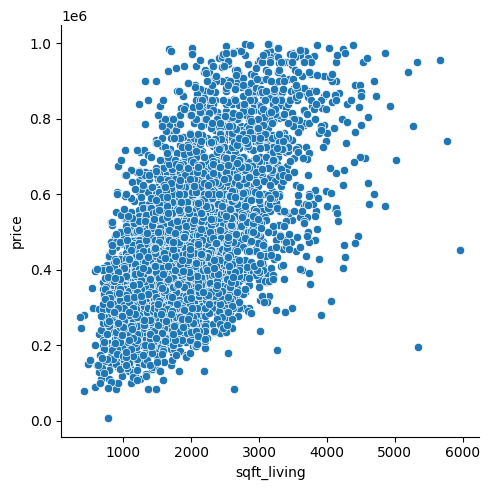

In [10]:
sns.relplot(data=housing, x='sqft_living', y='price')

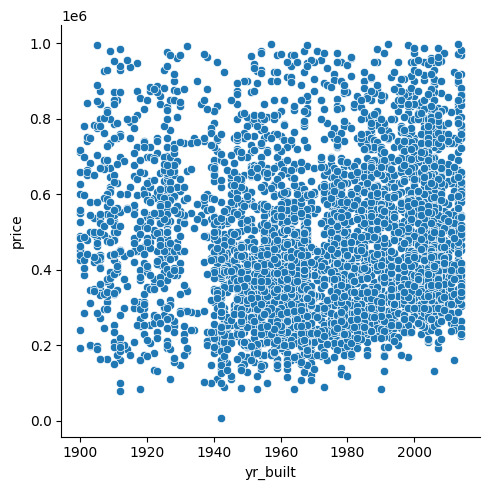

In [11]:
sns.relplot(data=housing, x='yr_built', y='price')

## How to identify correlations with a grid of scatterplots

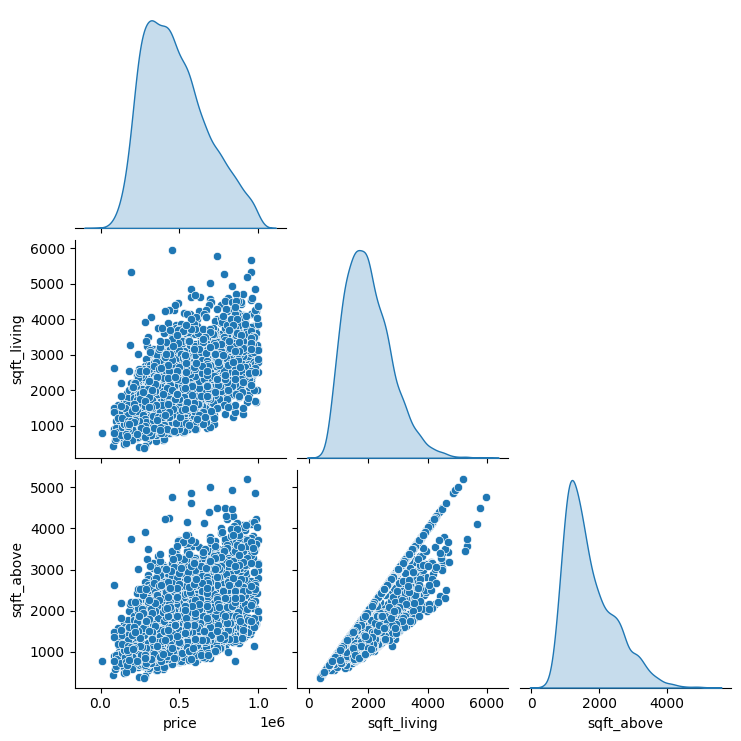

In [13]:
sns.pairplot(data=housing,
             y_vars=['price','sqft_living','sqft_above'],
             x_vars=['price','sqft_living','sqft_above'],
             diag_kind='kde',corner=True)

## How to identify correlations with r-values

In [15]:
housing.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
price,1.000000,0.305046,0.460155,0.607379,0.272151,0.073671,0.196460,0.044926,0.517395,0.053012,0.152591
bedrooms,0.305046,1.000000,0.516726,0.603655,0.148377,-0.032263,0.060074,0.015105,0.466683,0.154287,0.157001
bathrooms,0.460155,0.516726,1.000000,0.715626,0.495380,0.020700,0.112797,-0.145555,0.637045,0.521801,0.127437
sqft_living,0.607379,0.603655,0.715626,1.000000,0.325647,0.030473,0.184432,-0.086310,0.848312,0.331001,0.175223
floors,0.272151,0.148377,0.495380,0.325647,1.000000,0.008710,-0.006647,-0.298350,0.526227,0.502039,-0.305249
waterfront,0.073671,-0.032263,0.020700,0.030473,0.008710,1.000000,0.321411,0.026089,0.020846,-0.037066,0.001688
view,0.196460,0.060074,0.112797,0.184432,-0.006647,0.321411,1.000000,0.041332,0.075312,-0.064988,0.152347
condition,0.044926,0.015105,-0.145555,-0.086310,-0.298350,0.026089,0.041332,1.000000,-0.209960,-0.394022,0.167838
sqft_above,0.517395,0.466683,0.637045,0.848312,0.526227,0.020846,0.075312,-0.209960,1.000000,0.456452,-0.294986
yr_built,0.053012,0.154287,0.521801,0.331001,0.502039,-0.037066,-0.064988,-0.394022,0.456452,1.000000,-0.198823


In [17]:
housing.corr().where(housing.corr().abs() > 0.6, "")

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
price,1.0,,,0.607379,,,,,,,
bedrooms,,1.0,,0.603655,,,,,,,
bathrooms,,,1.0,0.715626,,,,,0.637045,,
sqft_living,0.607379,0.603655,0.715626,1.0,,,,,0.848312,,
floors,,,,,1.0,,,,,,
waterfront,,,,,,1.0,,,,,
view,,,,,,,1.0,,,,
condition,,,,,,,,1.0,,,
sqft_above,,,0.637045,0.848312,,,,,1.0,,
yr_built,,,,,,,,,,1.0,


In [20]:
housing.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.607379
sqft_above,0.517395
bathrooms,0.460155
bedrooms,0.305046
floors,0.272151
view,0.196460
has_basement,0.152591
waterfront,0.073671
yr_built,0.053012


## How to identify correlations with a heatmap

<Axes: >

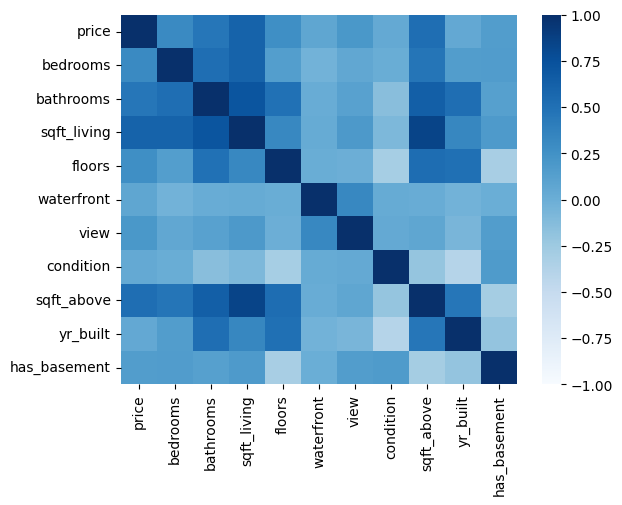

In [22]:
corr = housing.corr()
sns.heatmap(data=corr, cmap='Blues', vmin=-1.0, vmax=1.0)

<Axes: >

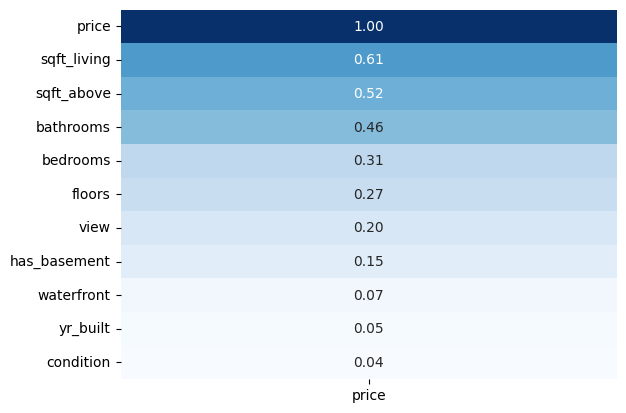

In [23]:
corr = housing.corr()[['price']].sort_values(by='price', ascending=False)
sns.heatmap(data=corr, annot=True, cmap='Blues', cbar=False, fmt=f'.2f')

## How to create, validate, and use a linear regression model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(
    housing[['sqft_living']], housing[['price']],
    test_size=0.20, random_state=42)

# create the model from the training dataset
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

# validate the model with the test dataset, by returning the R^2 value (0 = no better than average, 1 = perfect predictions)
linearModel.score(x_test, y_test)

0.35231692214708976

In [30]:
# use the model to make predictions
y_predicted = linearModel.predict(x_test)
y_predicted[:5]

array([[355333.95790923],
       [543693.00415078],
       [465858.68752204],
       [517229.33649701],
       [537466.25882048]])

## How to plot the predicted data

In [34]:
x_test.head()

,sqft_living
1855,1240
3834,2450
2755,1950
4364,2280
4286,2410


In [36]:
# put predicted values in a frame
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])

# combine the test data and the predicted data
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])
combined

,price_predicted,sqft_living,price
0,355333.957909,1240,390000.0
1,543693.004151,2450,345000.0
2,465858.687522,1950,375000.0
3,517229.336497,2280,500324.0
4,537466.258820,2410,600000.0
...,...,...,...
837,358447.330574,1260,350000.0
838,434724.960871,1750,525000.0
839,546806.376816,2470,449950.0
840,378684.252898,1390,270000.0


In [38]:
# melt price and price_predicted columns into a single column
melted = pd.melt(combined, id_vars=['sqft_living'],
                 value_vars=['price','price_predicted'],
                 var_name='price_type', value_name='price_value')
melted.head()

,sqft_living,price_type,price_value
0,1240,price,390000.0
1,2450,price,345000.0
2,1950,price,375000.0
3,2280,price,500324.0
4,2410,price,600000.0


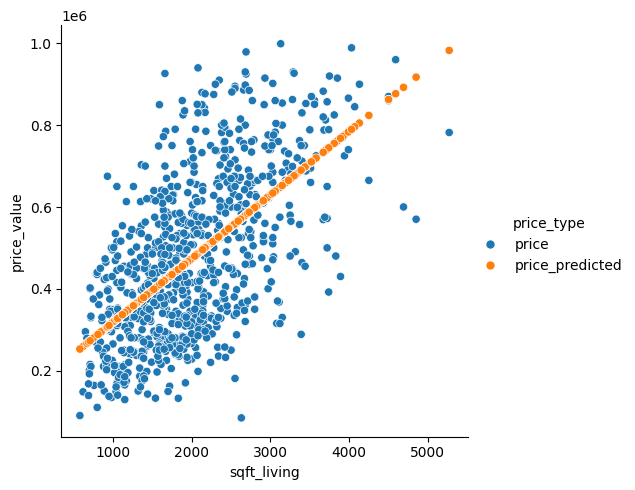

In [39]:
sns.relplot(data=melted, x='sqft_living', y='price_value',
            hue='price_type')

## How to plot the residuals

In [40]:
combined['residual'] = combined['price'] - combined['price_predicted']
combined.head()

,price_predicted,sqft_living,price,residual
0,355333.957909,1240,390000.0,34666.042091
1,543693.004151,2450,345000.0,-198693.004151
2,465858.687522,1950,375000.0,-90858.687522
3,517229.336497,2280,500324.0,-16905.336497
4,537466.258820,2410,600000.0,62533.741180


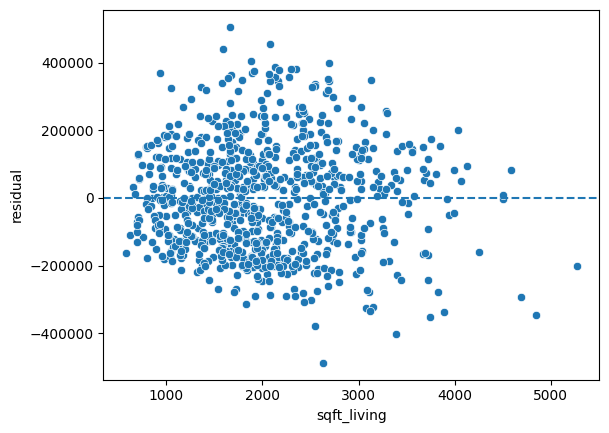

In [41]:
ax = sns.scatterplot(data=combined, x='sqft_living', y='residual')
ax.axhline(0, ls='--')

## How to plot a linear regression

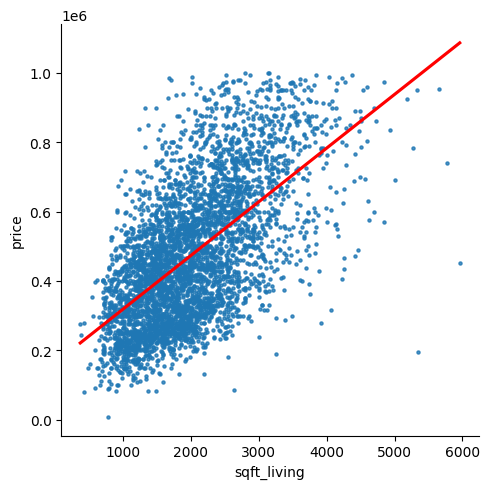

In [43]:
sns.lmplot(data=housing, x='sqft_living', y='price', ci=None,
           scatter_kws={'s':5}, line_kws={'color':'red'})

## How to plot a logistic regression

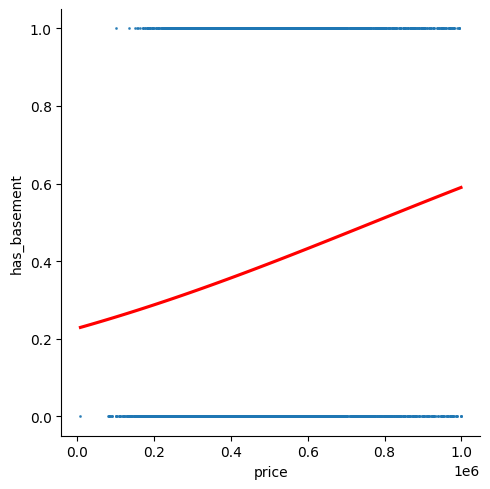

In [ ]:
sns.lmplot(data=housing, x='price', y='has_basement', ci=None,
           scatter_kws={'s':1}, line_kws={'color':'red'},
           logistic=True)

In [45]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(
    housing[['price']], housing[['has_basement']],
    test_size=0.20, random_state=42)

model = LogisticRegression()
model.fit(x_train,y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-1.23270661]
Coefficients: [[1.60767469e-06]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## How to plot a polynormal regression

In [ ]:
# get the data
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,1983.8
1,1901,01-04 Years,1695.0
2,1902,01-04 Years,1655.7
3,1903,01-04 Years,1542.1
4,1904,01-04 Years,1591.5


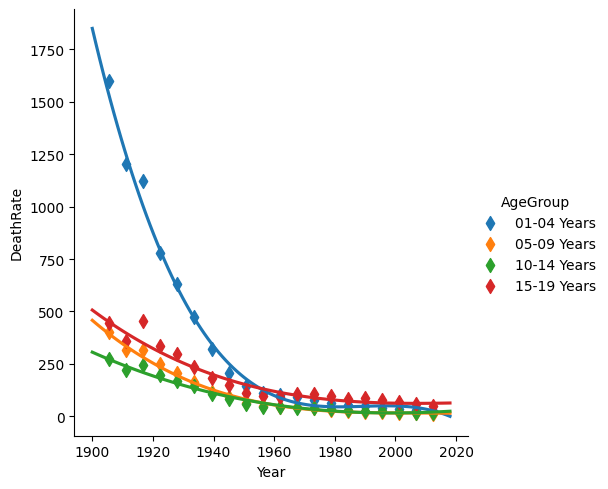

In [ ]:
sns.lmplot(x='Year', y='DeathRate', hue='AgeGroup', data=mortality_data, ci=None,
           markers='d', x_bins=20, order=3)

## How to plot a lowess regression

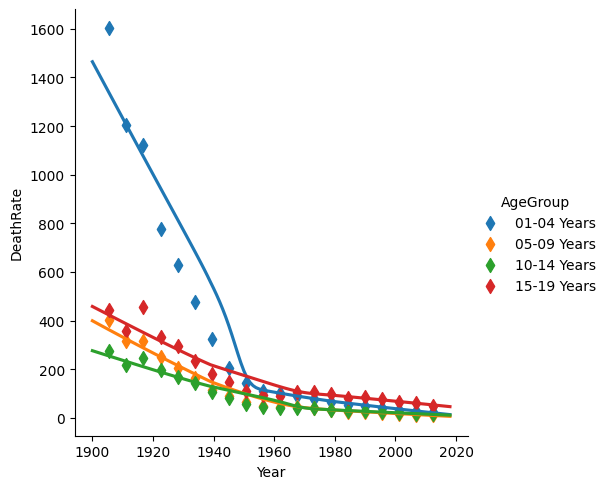

In [ ]:
sns.lmplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup',
           ci=None, markers='d', x_bins=20, lowess=True)

## How to plot residuals with Seaborn

<Axes: xlabel='sqft_living', ylabel='price'>

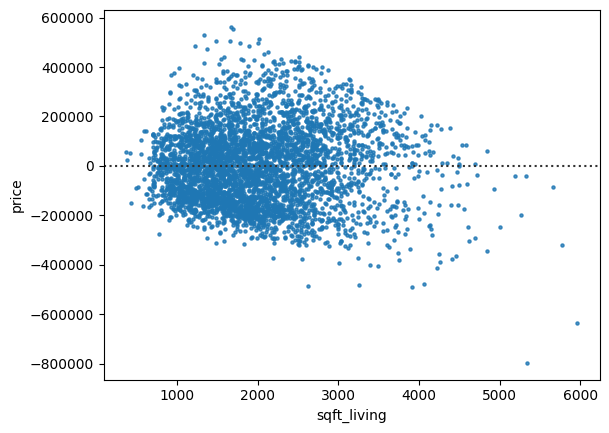

In [ ]:
sns.residplot(data=housing, x='sqft_living', y='price',
              scatter_kws={'s':5})

<Axes: xlabel='Year', ylabel='DeathRate'>

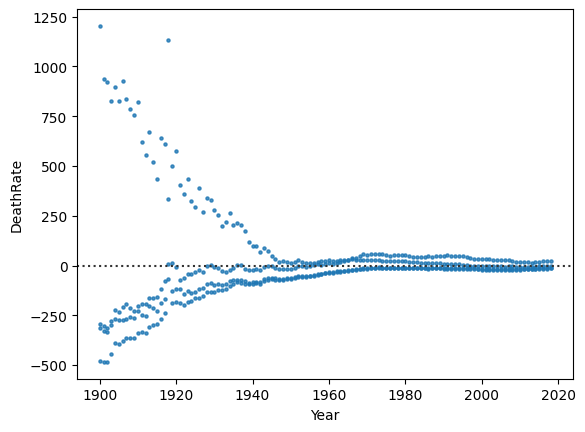

In [ ]:
sns.residplot(data=mortality_data, x='Year', y='DeathRate',
              order=3, scatter_kws={'s':5})